# Look at the relationship between ILO and ASPIRE savings data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
# WB api wrapper
import sys
sys.path.insert(0, '../git/wb_api_wrapper')
from wb_api_wrapper import mrv

In [3]:
# Import plotting routines
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
any_name_to_wb_name = pd.read_csv("../git/country_names/out/any_name_to_wb_name.csv",index_col="any",squeeze=True, encoding="utf-8")

## Open the ILO data bases

In [5]:
ILO_data = pd.read_csv('ILO/ILO.csv', index_col=0, encoding='utf-8')
ILO_data.index=(ILO_data.index.str.strip()) # Deletes white spaces at the end of the index entries in the ILO index
ILO_data.sort_index().head(12) # Correct flaws in the ILO data
ILO_data = ILO_data.rename(index=any_name_to_wb_name) # This is a sweet one-line command to rename the index using a dictionary-like translation, which in this case is any_name_to_wb_name
#ILO_data.index

In [6]:
ILO_data.head(3)

,Total public social protection expenditure and health expenditure,Public health care,Public social protection,year,sanity
country,,,,,
Algeria,8.53,3.17,5.36,2011,0
Angola,6.79,2.15,4.64,2011,0
Benin,4.2,2.22,1.98,2010,0


## Read in selected columns of the ASPIRE data

In [7]:
# !!! The following line may need changes if the ASPIRE input file changes !!!
#aspire_data = pd.read_excel('ASPIRE/ASPIRE_key_indicators_table.xlsx',header=[0,1],
#                            skiprows=[0,1],skip_footer=219,index_col=[4],
#                            encoding='utf-8',na_values=np.nan)
        

In [8]:
# !!! The following line may need changes if the ASPIRE input file changes !!!
aspire_data = pd.read_csv('ASPIRE/ASPIRE_key_indicators_table.csv', index_col=4, header=[1,2],
                         nrows=216,skip_blank_lines=False,encoding='utf-8', na_values='n.a.')

In [9]:
aspire_data.index

Index(['Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Argentina',
       'Argentina', 'Argentina', 'Argentina', 'Armenia', 'Armenia',
       ...
       'Uruguay', 'Uruguay', 'Uruguay', 'Venezuela, RB', 'Vietnam',
       'West Bank and Gaza', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=216)

In [10]:
aspire_data.index.rename('Country', inplace=True)

In [11]:
aspire_data.rename(columns={aspire_data.columns[0]:'Remark'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[1]:'Region'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[2]:'Country Code'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[3]:'Status'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[4]:'Year'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[5]:'Coverage: Poorest quintile'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[6]:'Coverage: Total'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[7]:'Poorest quintile'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[8]:'Poorest quintile: Average transfer amount ($/day per capita, PPP), Total'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[9]:'Adequacy: Poorest quintile'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[10]:'Adequacy: Total'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[11]:'Gini Inequality reduction due to SPL (% of population)'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[12]:'Poverty Headcount reduction due to SPL (% of population)'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[13]:'Poverty Gap reduction due to SPL (% of population)'}, inplace=True)
aspire_data.rename(columns={aspire_data.columns[14]:'Benefit- cost ratio of SPL programs'}, inplace=True)
aspire_data.drop(aspire_data.columns[15], axis=1, inplace=True)

In [12]:
aspire_data.head(3)

,Remark,Region,Country Code,Status,Year,Coverage: Poorest quintile,Coverage: Total,Poorest quintile,"Poorest quintile: Average transfer amount ($/day per capita, PPP), Total",Adequacy: Poorest quintile,Adequacy: Total,Gini Inequality reduction due to SPL (% of population),Poverty Headcount reduction due to SPL (% of population),Poverty Gap reduction due to SPL (% of population),Benefit- cost ratio of SPL programs
Country,,,,,,,,,,,,,,,
Afghanistan,NaN,SAR,AFG,Low income,2007,23.75,15.73,5.87,0.07,37.88,22.99,0.08,1.1,2.44,0.14
Afghanistan,*New survey*,SAR,AFG,Low income,2011,12.47,8.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,ECA,ALB,Upper middle income,2008,79.20,67.94,13.15,1.39,27.89,23.99,16.63,42.8,65.43,0.32


Rename index to World Bank spelling

In [13]:
aspire_data = aspire_data.rename(index=any_name_to_wb_name)

Write to new csv file to have a 'cleaner' copy for future usage

In [14]:
aspire_data.to_csv('ASPIRE/ASPIRE_key_indicators_table_corrected.csv', encoding='utf-8')

Keep only the most recent values

In [15]:
aspire_data = aspire_data[~aspire_data.index.duplicated(keep='last')] # CAREFUL!!!! This only works if the country sub-sets are well-ordered ...
# i.e. if the bottom entry is the most recent one! Should be made safe!

## Plot the data

### Plot1 shows public social protection and transfer to the poorest quintile

In [16]:
ilo_plot1 = ILO_data['Public social protection']
aspire_plot1 = aspire_data['Poorest quintile: Average transfer amount ($/day per capita, PPP), Total']

In [17]:
aspire_plot1.head()

Country
Afghanistan      NaN
Albania         1.55
Argentina      10.87
Armenia         1.19
Armenia         1.18
Name: Poorest quintile: Average transfer amount ($/day per capita, PPP), Total, dtype: float64

In [18]:
ilo_plot1 = pd.to_numeric(ilo_plot1, errors='coerce') # This changes str to flt

In [19]:
plot1 = pd.concat([ilo_plot1, aspire_plot1], axis=1)
type(plot1)

pandas.core.frame.DataFrame

In [20]:
plot1.rename(columns={'Public social protection':'pub_soc_prot',
                      'Poorest quintile: Average transfer amount ($/day per capita, PPP), Total':'trf_poor'}, inplace=True)
plot1.head()

,pub_soc_prot,trf_poor
Afghanistan,1.99,NaN
Albania,8.15,1.55
Algeria,5.36,NaN
Angola,4.64,NaN
Antigua and Barbuda,3.05,NaN


## Make a fit

### Linear model OLS

In [21]:
X = plot1.values[:,0]
Y = plot1.values[:,1]
X = sm.add_constant(X)

In [22]:
model = sm.OLS(Y, X, missing='drop') # This is for a simple linear model OLS fit
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 18 Apr 2016   Prob (F-statistic):           2.12e-18
Time:                        18:02:27   Log-Likelihood:                -169.04
No. Observations:                  97   AIC:                             342.1
Df Residuals:                      95   BIC:                             347.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1617      0.215     -0.751      0.454        -0.589     0.265
x1             0.3299      0.030     10.888      0.000         0.270     0.390
==============================================================================
Omnibus:                       48.676   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.911
Skew:                           1.598   Prob(JB):                     3.89e-44
Kurtosis:                       9.265   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x_grid = np.linspace(0,np.nanmax(plot1.values[:,0]),100)

In [24]:
#sm.graphics.regressionplots.plot_partregress(plot1.values[:,0], plot1.values[:,1])
results.params

array([-0.16169143,  0.32988645])

In [25]:
y_hat_lin = results.params[0] + results.params[1] * x_grid

## Make two different fits

with y1 = c_0 + a*x for all x smaller than a threshold, and y2 = c_1 + b*x for all x >= than that threshold

Define the threshold:

In [26]:
fit_thrs = 8

### Parameters for the first piece:

In [27]:
X1 = plot1['pub_soc_prot'][plot1['pub_soc_prot']<=fit_thrs]
Y1 = plot1['trf_poor'][plot1['pub_soc_prot']<=fit_thrs]
#X1 = sm.add_constant(X1)

In [28]:
model1 = sm.OLS(Y1, X1, missing='drop') # This is for a simple linear model OLS fit
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               trf_poor   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     65.22
Date:                Mon, 18 Apr 2016   Prob (F-statistic):           1.32e-11
Time:                        18:02:28   Log-Likelihood:                -98.428
No. Observations:                  71   AIC:                             198.9
Df Residuals:                      70   BIC:                             201.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
pub_soc_prot     0.2658      0.033      8.076      0.000         0.200     0.331
==============================================================================
Omnibus:                       55.673   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.108
Skew:                           2.420   Prob(JB):                     1.97e-52
Kurtosis:                      10.554   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_grid_1 = np.linspace(0,fit_thrs,20)
y_hat_1 = results1.params[0] * x_grid_1 # This formula assumes that there is no constant in the OLS

### Parameters for the second piece

In [30]:
X2 = plot1['pub_soc_prot'][plot1['pub_soc_prot']>fit_thrs]
Y2 = plot1['trf_poor'][plot1['pub_soc_prot']>fit_thrs]
X2 = sm.add_constant(X2)

In [31]:
#X2['const'] = y_hat_1[-1]

In [32]:
model2 = sm.OLS(Y2, X2, missing='drop') # This is for a simple linear model OLS fit
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               trf_poor   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     19.75
Date:                Mon, 18 Apr 2016   Prob (F-statistic):           0.000171
Time:                        18:02:28   Log-Likelihood:                -53.986
No. Observations:                  26   AIC:                             112.0
Df Residuals:                      24   BIC:                             114.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -4.0782      1.799     -2.267      0.033        -7.791    -0.366
pub_soc_prot     0.6432      0.145      4.444      0.000         0.344     0.942
==============================================================================
Omnibus:                       17.816   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.874
Skew:                           1.524   Prob(JB):                     1.08e-05
Kurtosis:                       6.439   Cond. No.                         57.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
x_grid_2 = np.linspace(fit_thrs,20,20)
y_hat_2 = results2.params[0] + results2.params[1] * x_grid_2

### Try a different method: Use the formula and curve fitting approach for piecewise estimation / interpolation
We want to use a fomula like <br />
y* ~ a*x for x <= Theta <br />
y* ~ a*x + b*(x - Theta) for x > Theta

In [34]:
XY = plot1.dropna() # Get rid of NaNs

In [35]:
X = XY['pub_soc_prot'].values
Y = XY['trf_poor'].values

In [36]:
Y.shape

(97,)

In [37]:
def linear(x, a, b):
    y2 = a + b*x
    return y2

#def piecewise_linear(x, x0, y0, a, b):
#    return np.piecewise(x, [x < x0], [lambda x:a*x + y0-a*x0, lambda x:b*x + y0-b*x0])

def piecewise_linear(x, Theta, a, b):
    return np.piecewise(x, [x <= Theta, x > Theta ], [lambda x:a*x, lambda x:a*x + b*(x-Theta)])

In [38]:
popt_lin, pcov_lin = sp.optimize.curve_fit(linear, np.array(X), np.array(Y)) # input needs np.array

In [39]:
popt, pcov = sp.optimize.curve_fit(piecewise_linear, np.array(X), np.array(Y)) # input needs np.array

In [40]:
print(popt)

[ 9.39097428  0.2276889   0.3806569 ]


In [41]:
print(pcov)

[[  3.22049903e+00   3.29371824e-02   1.47963693e-01]
 [  3.29371824e-02   1.33508677e-03  -1.33508675e-03]
 [  1.47963693e-01  -1.33508675e-03   1.95425691e-02]]


In [42]:
y_hat_lin = linear(x_grid, popt_lin[0], popt_lin[0])

In [43]:
y_hat_piece = piecewise_linear(x_grid, popt[0], popt[1], popt[2])

In [44]:
X.shape

(97,)

## Use nonparametric regression / curve fitting

See http://pythonhosted.org/PyQt-Fit/NonParam_tut.html for the example that this code follows along

In [45]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods

In [46]:
XY = plot1.dropna() # Get rid of NaNs

In [47]:
X = XY['pub_soc_prot']
Y = XY['trf_poor']

In [48]:
k0 = smooth.NonParamRegression(X, Y, method=npr_methods.LocalPolynomialKernel(q=1))

In [49]:
k0.fit()

### Plot

In [50]:
popt

array([ 9.39097428,  0.2276889 ,  0.3806569 ])

AttributeError: Unknown property fillstyle

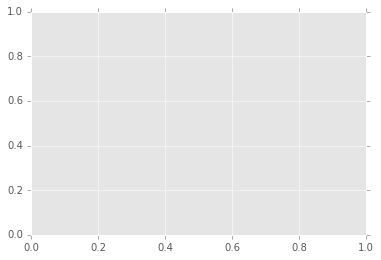

In [60]:
fig1 = plt.figure()
fig1 = plt.scatter(plot1.values[:,0], plot1.values[:,1], color='r', marker='o', fillstyle='none', clip_on=False)
#plt.plot(x_grid, y_hat_lin, 'g-', label = 'Continous linear', linewidth=2)
#plt.plot(x_grid_1, y_hat_1, 'k-', label = 'Piecewise linear', linewidth=2)
#plt.plot(x_grid_2, y_hat_2, 'k-', linewidth=2)
plt.plot(x_grid, y_hat_piece, label="Piecewise fit", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_lin, label="Linear fit", color = 'purple', ls = '-', linewidth=2)
plt.plot(x_grid, k0(x_grid), label="Nonparam. fit, locally linear", color = 'blue', ls = '--', linewidth=2)
plt.xlabel('ILO Public Social Protection')
plt.ylabel('ASPIRE: Av trf/mnth poorest quint')
plt.xlim(0)
plt.ylim(0)
plt.legend()

Share of income from social protection for bottom quintile and all other quintiles

# Look at data availability
Compare the number of countries in ASPIRE and in ILO

Number of countries in the ILO database: Total public social protection expenditure and health expenditure

In [52]:
ILO_data.index.size

193

Number of countries in ASPIRE: Average transfer to the poorest quintile ($/day per capita, PPP)

In [53]:
aspire_data.index.size

118

In [54]:
ILO_data.dropna().index.size

188

In [55]:
aspire_data.dropna().index.size

35

Which countries exist in ILO which do not exist in ASPIRE?

In [56]:
ILO_data.index.difference(aspire_data.index)

Index(['Algeria', 'Angola', 'Antigua and Barbuda', 'Aruba',
       'Asia and the Middle East', 'Australia', 'Austria', 'Bahamas, The',
       'Bahrain', 'Barbados', 'Belgium', 'Brunei Darussalam', 'Burundi',
       'Canada', 'Central African Republic', 'Chad', 'China',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands', 'Cote d'Ivoire',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Europe', 'Finland', 'France', 'Germany',
       'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Hong Kong SAR, China', 'Iceland', 'Iran, Islamic Rep.', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait',
       'Latin America and the Caribbean', 'Libya', 'Luxembourg',
       'Macao SAR, China', 'Macedonia, FYR', 'Malta', 'Myanmar', 'Nauru',
       'Netherlands', 'New Zealand', 'North America', 'Norway', 'Oceania',
       'Oman', 'Portugal', 'Qatar', 'Samoa', 'San Marino', 'Saudi Arabia',
       'Seychelles',

In [57]:
aspire_data.index.difference(ILO_data.index)

Index(['Armenia ', 'Bhutan ', 'Comoros', 'Congo Democratic Republic',
       'Congo Republic', 'Cote D'Ivoire', 'Gabon', 'India ',
       'Micronesia, Fed. Sts.', 'West Bank and Gaza'],
      dtype='object')

In [58]:
aspire_data.index.sort

<bound method Index.sort of Index(['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Armenia ',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin',
       ...
       'Turkey', 'Uganda', 'Ukraine', 'Uruguay', 'Venezuela, RB', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=118)>